In [2]:
import pandas as pd
import numpy as np
import datetime 
import re
from urlextract import URLExtract
import spacy
import time
import pickle
import matplotlib.pyplot as plt

In [3]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
extractor = URLExtract()
# remove all urls from posts
def replace_urls(x):
    urls = extractor.find_urls(x)
    if urls:
        x_new = replace_urls(x.replace(urls[0],''))
        return x_new
    else:
        return x

In [5]:
# df_full = pd.read_csv('data/sample_depression_large.csv', low_memory=False)
# df_full = pd.read_csv('data/mentalhealth01-18_08-19.csv', low_memory=False)
# df_full = pd.read_csv('data/depression_wrd_vec_lrg.csv', low_memory=False)
# df_full = pd.read_csv('data/suicidewatch.csv', low_memory=False)
df_full = pd.read_csv('data/anxiety_full2.csv', low_memory=False)
# df_full = pd.read_csv('data/depression_full2.csv', low_memory=False)

df_full.dropna(subset=['selftext'], inplace=True)
df_full.dropna(subset=['title'], inplace=True)

In [6]:
# temp = df_full.groupby('selftext').size().sort_values(ascending=False).to_frame()
# temp2 = temp.reset_index()
# temp3 = temp2[temp2[0] > 1]
# temp3
# temp2 = temp[temp.values>1]
# temp2

In [7]:

# df_full.selftext.value_counts().to_frame().head(50)

In [8]:
df_full.selftext.isna().sum()

0

In [10]:
a = df_full.groupby('id').size().sort_values(ascending=False).values
b = df_full.groupby('selftext').size().sort_values(ascending=False).values
b

array([37, 36, 36, ...,  1,  1,  1])

In [11]:
# df_full = df_orig[(df_orig['selftext'] != '[deleted]') & (df_orig['selftext'] != '[removed]')].copy()

df_full.drop_duplicates(subset=['selftext'], inplace=True)
df_full.drop_duplicates(subset=['id'], inplace=True)

In [12]:
df_full.groupby('selftext').size().sort_values(ascending=False).head(10)

selftext
����\n\nMy anxiety is always overwhelming at night, and I’d like to know if anyone has an evening routine that helps calm anxious thoughts and promote restful sleep. I’m aware of the common recommendations like taking a warm bath, cutting out caffeine, etc. \n\nDoes anyone have another strategy (specific to calming racing thoughts and falling asleep) to recommend?\n\nSome background info: \n\nI’m a young breast cancer survivor.  I went through a radical double mastectomy, several major reconstructive surgeries, chemo,  and radiation. Thankfully, I am in remission and taking powerful meds to keep it that way. I’ve always struggled mightily with anxiety, but after such intense medical trauma, it seems to have worsened significantly. I have two young sons, a part-time job, and a husband who travels extensively for work. Needless to say, I am super busy during the day and my mind is occupied. \n\nHowever, it seems the moment things slow down in the evening and bedtime approaches, 

In [13]:
df_full['date'] = df_full.created_utc.apply(lambda x: pd.to_datetime(time.ctime(x)))

In [14]:
# df_full.groupby('selftext').unique()
# df_full.selftext.value_counts().to_frame().head(50)

In [15]:
# df_full[df_full.selftext.str.contains('I hate seeing my dad’s face')]
# df_full.selftext.dropna(inplace=True)

In [16]:
df_full['selftext'] = df_full.selftext.map(lambda x: re.sub("&amp;#x200B;",' ',str(x)))
df_full['selftext'] = df_full.selftext.map(lambda x: re.sub("&amp;nbsp;",' ',str(x)))
df_full['selftext'] = df_full.selftext.map(lambda x: re.sub("&amp;",' ',str(x)))
df_full['selftext'] = df_full.selftext.map(lambda x: re.sub("nbsp;",' ',str(x)))


df_full['selftext'] = df_full.selftext.map(lambda x: re.sub('\n',' ',str(x)))
df_full['selftext'] = df_full.selftext.map(lambda x: re.sub('  ',' ',str(x)))
df_full['selftext'] = df_full.selftext.map(lambda x: replace_urls(x))
# df_full['date'] = df_full.created_utc.apply(lambda x: pd.to_datetime(time.ctime(x)))

In [17]:
temp = df_full.groupby('title').size().sort_values(ascending=False)
df_full.drop_duplicates(subset=['selftext'], inplace=True)

In [18]:
df_full['text_title'] = df_full.title + ' ' + df_full.selftext
df_full['text_title'] = df_full['text_title'].apply(lambda x: str(x))
df_full['text_title'] = df_full['text_title'].apply(lambda x: x.lower())

In [19]:
# df_non_null = df_full[(df_full.selftext != '[removed]')&(df_full.selftext != '[deleted]') & (df_full.selftext != 'nan')].copy()

In [20]:
df_full.text_title.value_counts().sort_values(ascending=False)

excessive worrying. feeds anxiety i have gad i worry constantly. one time i really focused on avoiding mental stress and when i catch myself worrying about something i try to let it go. and not dwell on it further. after a few months i started to feel better than ever. my heart palpitations where gone, and my anxiety was lower.. i told myself i am better i fixed my health. and i started living my life without using my new thought patterns and after a few weeks. i got all my symptoms back. and i lost hope again.   what if worrying is the problem of all my symptoms. worry causes stress. and we worry all the time. so our body’s are basically constantly bombarded with stress. constantly in flight or fight state. this is keeping us sick. i know it’s hard to stop worrying and stop do stimulating things like watching intense movies. and play intense games. but i really think this is the root cause that we stay in this anxious state because we can’t heal until the mind is calm for a prolonged 

In [21]:
# df_full.drop_duplicates(subset=['text_title'], inplace=True)

<AxesSubplot:xlabel='date,date'>

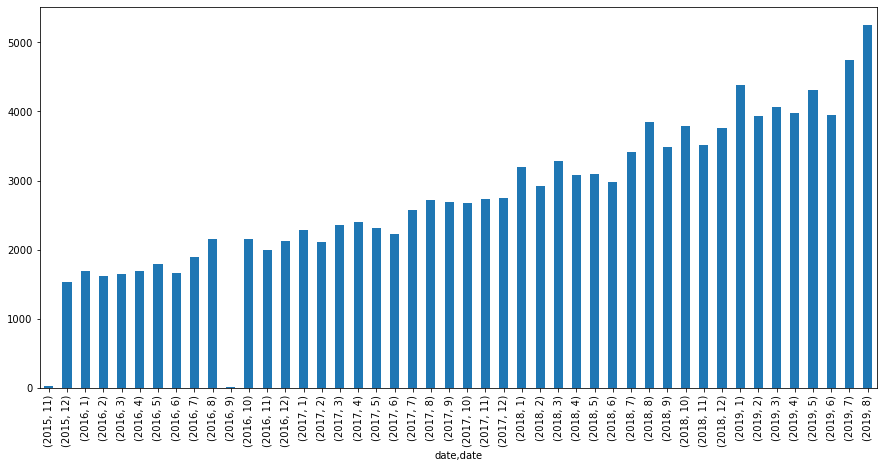

In [22]:
plt.figure(figsize=[15,7])
df_full.groupby([df_full["date"].dt.year, df_full["date"].dt.month]).size().plot(kind="bar")

In [23]:
nlp = spacy.load("en")

In [425]:
df_full

,created_utc,subreddit,author,domain,url,num_comments,score,ups,downs,title,...,is_self,from_id,permalink,name,author_flair_text,quarantine,link_flair_text,distinguished,date,text_title
0,1451002020,Anxiety,spwf,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/3y4s...,2,4,4.0,0.0,"My empathy bites me in the ass, on a frequent ...",...,True,NaN,/r/Anxiety/comments/3y4suk/my_empathy_bites_me...,t3_3y4suk,NaN,False,NaN,NaN,2015-12-24 18:07:00,"my empathy bites me in the ass, on a frequent ..."
1,1451448026,Anxiety,steve472,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/3yqo...,4,3,3.0,0.0,hey guys can you help me out? thanks,...,True,NaN,/r/Anxiety/comments/3yqouu/hey_guys_can_you_he...,t3_3yqouu,NaN,False,Needs A Hug/Support,NaN,2015-12-29 22:00:26,hey guys can you help me out? thanks hey guys ...
2,1451183146,Anxiety,cooperslink,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/3ycq...,5,3,3.0,0.0,This is probably common...,...,True,NaN,/r/Anxiety/comments/3ycqjv/this_is_probably_co...,t3_3ycqjv,NaN,False,NaN,NaN,2015-12-26 20:25:46,this is probably common... i always feel like ...
3,1450836919,Anxiety,[deleted],self.Anxiety,https://www.reddit.com/r/Anxiety/comments/3xwu...,0,2,2.0,0.0,My Boyfriend Is Afraid of Disasters Every Day,...,True,NaN,/r/Anxiety/comments/3xwuuf/my_boyfriend_is_afr...,t3_3xwuuf,NaN,False,Relationships,NaN,2015-12-22 20:15:19,my boyfriend is afraid of disasters every day ...
4,1450657537,Anxiety,ArcadeInvasion,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/3xn1...,6,10,10.0,0.0,What do you do to help with your anxiety?,...,True,NaN,/r/Anxiety/comments/3xn1yo/what_do_you_do_to_h...,t3_3xn1yo,NaN,False,Needs A Hug/Support,NaN,2015-12-20 18:25:37,what do you do to help with your anxiety? just...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140105,1496271608,Anxiety,kcapc213,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/6eio...,2,1,NaN,NaN,Do I have an anxiety disorder?,...,True,NaN,/r/Anxiety/comments/6eiorq/do_i_have_an_anxiet...,NaN,NaN,False,NaN,NaN,2017-05-31 18:00:08,"do i have an anxiety disorder? recently, i've ..."
140106,1493734262,Anxiety,mackstrat,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/68tc...,0,1,NaN,NaN,"A little bit of my life, parental issues, and ...",...,True,NaN,/r/Anxiety/comments/68tcf9/a_little_bit_of_my_...,NaN,NaN,False,NaN,NaN,2017-05-02 09:11:02,"a little bit of my life, parental issues, and ..."
140107,1494717413,Anxiety,Sportgirl234,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/6b0u...,10,97,NaN,NaN,Panic attack at the gym,...,True,NaN,/r/Anxiety/comments/6b0ubj/panic_attack_at_the...,NaN,NaN,False,NaN,NaN,2017-05-13 18:16:53,panic attack at the gym today my husband and i...
140111,1494131908,Anxiety,Whit3boy316,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/69pk...,1,4,NaN,NaN,6 year old with anxiety when sick - help,...,True,NaN,/r/Anxiety/comments/69pkrb/6_year_old_with_anx...,NaN,NaN,False,Needs A Hug/Support,NaN,2017-05-06 23:38:28,6 year old with anxiety when sick - help hello...


In [24]:
df_clean = df_full.reset_index().drop(columns=['index'])
df_clean
# topic_sample = df_clean.sample(120570, random_state=1)
# topic_sample

,created_utc,subreddit,author,domain,url,num_comments,score,ups,downs,title,...,is_self,from_id,permalink,name,author_flair_text,quarantine,link_flair_text,distinguished,date,text_title
0,1451002020,Anxiety,spwf,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/3y4s...,2,4,4.0,0.0,"My empathy bites me in the ass, on a frequent ...",...,True,NaN,/r/Anxiety/comments/3y4suk/my_empathy_bites_me...,t3_3y4suk,NaN,False,NaN,NaN,2015-12-24 18:07:00,"my empathy bites me in the ass, on a frequent ..."
1,1451448026,Anxiety,steve472,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/3yqo...,4,3,3.0,0.0,hey guys can you help me out? thanks,...,True,NaN,/r/Anxiety/comments/3yqouu/hey_guys_can_you_he...,t3_3yqouu,NaN,False,Needs A Hug/Support,NaN,2015-12-29 22:00:26,hey guys can you help me out? thanks hey guys ...
2,1451183146,Anxiety,cooperslink,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/3ycq...,5,3,3.0,0.0,This is probably common...,...,True,NaN,/r/Anxiety/comments/3ycqjv/this_is_probably_co...,t3_3ycqjv,NaN,False,NaN,NaN,2015-12-26 20:25:46,this is probably common... i always feel like ...
3,1450836919,Anxiety,[deleted],self.Anxiety,https://www.reddit.com/r/Anxiety/comments/3xwu...,0,2,2.0,0.0,My Boyfriend Is Afraid of Disasters Every Day,...,True,NaN,/r/Anxiety/comments/3xwuuf/my_boyfriend_is_afr...,t3_3xwuuf,NaN,False,Relationships,NaN,2015-12-22 20:15:19,my boyfriend is afraid of disasters every day ...
4,1450657537,Anxiety,ArcadeInvasion,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/3xn1...,6,10,10.0,0.0,What do you do to help with your anxiety?,...,True,NaN,/r/Anxiety/comments/3xn1yo/what_do_you_do_to_h...,t3_3xn1yo,NaN,False,Needs A Hug/Support,NaN,2015-12-20 18:25:37,what do you do to help with your anxiety? just...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126719,1496271608,Anxiety,kcapc213,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/6eio...,2,1,NaN,NaN,Do I have an anxiety disorder?,...,True,NaN,/r/Anxiety/comments/6eiorq/do_i_have_an_anxiet...,NaN,NaN,False,NaN,NaN,2017-05-31 18:00:08,"do i have an anxiety disorder? recently, i've ..."
126720,1493734262,Anxiety,mackstrat,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/68tc...,0,1,NaN,NaN,"A little bit of my life, parental issues, and ...",...,True,NaN,/r/Anxiety/comments/68tcf9/a_little_bit_of_my_...,NaN,NaN,False,NaN,NaN,2017-05-02 09:11:02,"a little bit of my life, parental issues, and ..."
126721,1494717413,Anxiety,Sportgirl234,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/6b0u...,10,97,NaN,NaN,Panic attack at the gym,...,True,NaN,/r/Anxiety/comments/6b0ubj/panic_attack_at_the...,NaN,NaN,False,NaN,NaN,2017-05-13 18:16:53,panic attack at the gym today my husband and i...
126722,1494131908,Anxiety,Whit3boy316,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/69pk...,1,4,NaN,NaN,6 year old with anxiety when sick - help,...,True,NaN,/r/Anxiety/comments/69pkrb/6_year_old_with_anx...,NaN,NaN,False,Needs A Hug/Support,NaN,2017-05-06 23:38:28,6 year old with anxiety when sick - help hello...


In [78]:
# df_clean.to_csv('data/depression_temp_clean.csv')

In [28]:
from spacy.lang.en.stop_words import STOP_WORDS

def process_text(nlp, text, pos_list, lemma=False):

    text_full = [] 
    for doc in nlp.pipe(text, disable=['parser', 'ner', 'tagger']):
        # if part of speech list isnt empty return matches for pos
        if pos_list:
            tokens = [(ent.pos_) for ent in doc if not ent.is_stop and not ent.is_punct and ent.pos_ in pos_list]
            cleaned_text = " ".join(tokens)
            text_full.append(cleaned_text)
        elif lemma == True:
            tokens = [(ent.lemma_) for ent in doc if not ent.is_stop and not ent.is_punct]
            cleaned_text = " ".join(tokens)
            text_full.append(cleaned_text)
        else:
            tokens = [(ent.text) for ent in doc if not ent.is_stop and not ent.is_punct]
            cleaned_text = " ".join(tokens)
            text_full.append(cleaned_text)
            
    return text_full

corp = df_clean.text_title
a = process_text(nlp, corp, pos_list=[], lemma=False)
len(a)

126724

In [29]:
corp2 = df_clean.title
title_only = process_text(nlp, corp2, pos_list=[], lemma=False)
len(title_only)

126724

In [223]:
corp3 = df_clean.selftext
selftext = process_text(nlp, corp3, pos_list=[], lemma=False)
len(selftext)

361276

In [185]:
corp2[19]

'My Wife and 2 infant daughters were killed this morning in a car crash.'

In [81]:
# import gensim
# documents = df_clean.text_title
# tokens = [' ' .join(gensim.utils.simple_preprocess(d)) for d in documents]
# tokens

In [184]:
title_only[19]

'Wife 2 infant daughters killed morning car crash'

In [80]:
anxiety_stop = ['feel',
 'want',
 'myself',
 'people', 'feelings', 'feeling', 'not', 'fuck',
 'fucking','fucks', 'day', 'days', 'love', 'hate', 'try', 'talk', 'know', 'life','today', 'time', 'know'
'life', 'things', 'time', 'think', 'want', 'thoughts', 'wanna', 'felt', 'kinda', 'let'
'going', 'way', 'bad', 'good', 'years', 'got', 
'thought', 'thing', 'lot', 'right', 'better', 'thinking', 'mind',
'getting', 'away', 'stop', 'trying', 'long', 'said', 'started',
'person', 'hard', 'past', 'head', 'makes', 'little', 'having',
'point', 'sure', 'told', 'ago', 'weeks', 'months', 'stuff', 'find', 'times', 'able', 'maybe', 'bit', 'etc',
'happened', 'went', 'tomorrow', 'taking', 'hour', 'fine',
'guys', 'start', 'idk', 'going', 'new', 'making', 'lot', 'minutes', 'happen', 'week', 'pass', 'year', 'gon', 'need',
'tips', 'happen', 'happens', 'gets', 'usually'] + ['helps', 'help', 'helped', 'nervous', 'great', 'place', 'tell', 'advice', 'like']

In [81]:
depression_stop = ['feel',
'want',
'myself',
'people', 'feelings', 'feeling', 'not', 'fuck',
'fucking','fucks', 'day', 'days', 'love', 'hate', 'try', 'talk', 'know', 'life',
'fuck', 'mental', 'shit', 'thing', 'things', 'wanna', 'way', 'think', 'anymore', 'having', 'group',
'happy', 'today', 'time','thanks','etc','better','year','years','lot','kinda', 'felt','going',
'wish', 'good','bad','person', 'die','told', 'care', 'cares', 'got', 'okay', 'end', 'need', 'help',
'aaa', 'aaaaaand', 'aaaaand', 'aaaand', 'aaand', 'aand', 'aas',
'let','happen', 'happened', 'happens', 'think','word','kinda','say', 'month','months','help', 'guy', 'ago', 'met', 'living',
'aaa', 'aaaaaand', 'aaaaand', 'aaaand', 'aaand', 'aand', 'aas', 'hard', 'long', 'said',
'have', 'live', 'lose', 'start', 'sure', 'able', 'maybe', 'find', 'times', 'new', 'make', 'get', 'getting', 'gets'
'feels', 'advice', 'makes', 'tell', 'telling', 'tells', 'away', 'idk', 'actually', 'thought', 'thoughts', 'taking'
'stopped', 'stop', 'say', 'saying', 'says', 'come', 'great', 'weeks', 'week', 'right', 'tomorrow', 'lately',
'work', 'tried', 'everyday', 'birthday', 'like',
'motivation'] + ['girlfriend', 'boyfriend', 'best']
#  'depression'
#  'fucking',
#  'mental',
#  'hate',
#  'health',
#  'life',
#  'need',
#  'anxiety',
#  'talk',
#  'anymore',
#  'die',
# #  'friends',
#  'fuck',
#  'feeling',
#  'time',
#  'shit',
# #  'tired',
#  'happy',
#  'better',
#  'things',
#  'going',
#  'bad',
#  'way',
#  'care',
#  'good',
#  'wish',
#  'person',
#  'sad',
#  'day',
#  'makes',
#  'years',
#  'right',
#  'tell',
#  'self',
#  'love',
#  'worse',
#  'try',
#  'thoughts',
#  'live',
#  'stop',
#  'feel',
#  'help',
#  'nan',
#  'people',
#  'fucking',
#  'hate',
#  'myself',
#  'mental',
#  'health',
#  'depressed',
#  'fuck',
#  'shit',
#  'self',
#  'person',
#  'makes',
#  'better',
#  'wanna',
#  'sad',
#  'good',
#  'way',
#  'try',
#  'understand',
#  'wrong',
# #  'lonely',
#  'advice',
#   'lose',
#  'find',
#  'care',
#  'feelings',
#  'idk',
#  'emotions',
#  'bad',
#  'issues',
#  'talking',
#  'stupid',
#  'actually',
#  'ask',
#  'like',
#  'right',
#  'thoughts',
#  'life',
#  'things','best', 'bit', 'lot', 'great', 'says', 'getting', 'come', 'thing', 'little', 'today', 'started', 'maybe', 'feels', 'feel', 'feeling',
# "told", 'tomorrow', 'everyday', 'future', 'reason', 'pay', 'got', 'said', 'everyday', 'tomorrow', 'week', 'old', 'start', 'anxious', 'able', 'tried',
#    'features']+ ['think', 'thinking', 'happen', 'look', 'not', 'have', 'will', 'ill', 'sorry', 'alot', 'point', 'cuz', 'kinda', 'tell', 'exist', 'wait',
# 'post', 'have'] + ['let','happen','think','word','kinda','say','matt']





In [94]:
vectorizer = TfidfVectorizer(
                             stop_words = anxiety_stop,
                             strip_accents='unicode',
                             min_df = 30,
                             ngram_range=(1, 1),
                             max_df = .5, 
                             token_pattern = r'\b[a-zA-Z]{3,}\b'
                             
)

# vectorizer = TfidfVectorizer(
#                              stop_words = depression_stop,
#                              strip_accents='unicode',
#                              min_df = 35,
# #                              ngram_range=(1, 1),
#                              ngram_range=(2, 2),

#                              max_df = .5, 
#                              token_pattern = r'\b[a-zA-Z]{3,}\b',
                             
# )

# vectorizer = TfidfVectorizer(
#                              stop_words = depression_stop,
#                              strip_accents='unicode',
#                              min_df = 30,
#                              ngram_range=(1, 1),
#                              max_df = .5, 
#                              token_pattern = r'\b[a-zA-Z]{3,}\b'
                             
# )

In [95]:
corpus = a
doc_term = vectorizer.fit_transform(corpus).toarray()

In [96]:
# df.score.unique().shape

In [97]:
df = pd.DataFrame(doc_term)
df.columns = vectorizer.get_feature_names()
# df.drop(columns=['tips'], inplace=True)
# df['depressed'].mean()
df

,aback,abandon,abandoned,abandoning,abandonment,abdomen,abdominal,abilify,abilities,ability,...,zip,zofran,zoloft,zombie,zone,zoned,zones,zoning,zoo,zyprexa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
# 361698 rows × 20614 columns

In [99]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):

        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print("\nTopic: ", ix)
        print([round(topic[i], 4) for i in topic.argsort()[:-no_top_words - 1:-1]])

In [100]:
nmf = NMF(16, alpha=.07, l1_ratio=.5, random_state=0, max_iter=300, init='nndsvd')
# nmf = NMF(11, alpha=.19, l1_ratio=.5, random_state=0, max_iter=500, init='nndsvd')
# nmf = NMF(12, alpha=.19, l1_ratio=.5, random_state=0, max_iter=10, init='nndsvd')

In [88]:
%%time
doc_topic = nmf.fit_transform(doc_term)

CPU times: user 53min 30s, sys: 1min 34s, total: 55min 5s
Wall time: 8min 24s


In [89]:
# svd = TruncatedSVD(n_components=10, n_iter=7, random_state=42)
# svd.fit_transform(doc_term)
term_topic = nmf.components_

In [71]:

# with open('pickles/depression.pickle', 'wb') as file:
#     pickle.dump(doc_term, file, protocol=4)
#     pickle.dump(vectorizer.get_feature_names(), file, protocol=4)
#     pickle.dump(doc_topic, file, protocol=4)
#     pickle.dump(term_topic, file, protocol=4)
    
# with open('pickles/anxiety.pickle', 'wb') as file:
#     pickle.dump(doc_term, file, protocol=4)
#     pickle.dump(vectorizer.get_feature_names(), file, protocol=4)
#     pickle.dump(doc_topic, file, protocol=4)
#     pickle.dump(term_topic, file, protocol=4)

In [90]:
display_topics(model=nmf, feature_names=vectorizer.get_feature_names(), no_top_words=100)


Topic  0
relationship, family, wrong, self, actually, let, fear, wanted, post, home, happy, depression, end, deal, worry, look, live, feels, house, come, worse, parents, therapist, mom, understand, talking, kind, shit, mental, problem, constantly, pretty, anymore, issues, looking, control, care, afraid, therapy, probably, boyfriend, world, reason, brain, sorry, situation, hope, completely, real, tried, old, problems, leave, remember, guess, health, living, saying, moment, room, normal, phone, recently, big, okay, found, read, stupid, dad, believe, girlfriend, worried, different, idea, finally, ask, worst, wish, change, mean, guy, comes, came, left, telling, seeing, small, lost, literally, fact, basically, reading, thank, break, girl, worrying, couple, sense, asked, crying

Topic:  0
[1.3466, 1.2469, 1.1287, 1.1237, 1.1178, 1.0653, 1.0543, 1.0374, 1.0312, 1.0264, 1.0244, 1.0198, 1.0073, 0.9999, 0.9972, 0.9954, 0.9942, 0.9755, 0.9724, 0.9689, 0.9594, 0.9581, 0.9438, 0.9358, 0.9276, 0.92

In [50]:
# display_topics(model=nmf, feature_names=vectorizer.get_feature_names(), no_top_words=100)

In [456]:
doc_topic2 = pd.DataFrame(doc_topic)
doc_topic2

anxiety_cols = ['general', 'panic', 'occupational',
                'sleep', 'medication', 'heart/chest',
                'anxious/super/reason', 'school', 'work',
                'friends/hang/groups', 'driving', 'sick/eat/stomach',
                'scared/fear/die', 'social/media/situations']

# depression_cols = ['general', 'depression/anxiety/diagnosed',
#                    'work/issues', 'tired/exhaused/complaints', 
#                    'social', 'depressed/unclear', 'school', 'sleep',
#                    'friend_drama', 'sad/emo', 'family', 'suicide',
#                    'therapy/medication', 'work/occupational']

depression_cols = ['general', 'depression/anxiety/meds',
                   'tired/sick', 'friends/lonely', 
                   'school', 'depressed/suicidal/reason', 'sleep', 'job',
                   'friend/best/girl', 'sad', 'kill/suicide']


title_only_cols = ['general', 'unclear',
                   'tired/sick', 'friends/fam/real', 
                   'lost/job/hope', 'kill/self/reason', 'friend/best/suicide', 'lonely/hurt',
                   'sad/reason/angry/music']

doc_topic2.columns = anxiety_cols
doc_topic2

,general,panic,occupational,sleep,medication,heart/chest,anxious/super/reason,school,work,friends/hang/groups,driving,sick/eat/stomach,scared/fear/die,social/media/situations
0,0.004000,0.000000,0.006060,0.004673,0.000000,0.000900,0.000000,0.000000,0.000000,0.005804,0.000000,0.001772,0.000000,0.000000
1,0.011194,0.000000,0.000000,0.002299,0.002523,0.001556,0.000866,0.015152,0.000000,0.000000,0.000000,0.000293,0.000000,0.000309
2,0.003547,0.000000,0.000000,0.011457,0.000000,0.003679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002853,0.000000
3,0.011495,0.002159,0.000000,0.001213,0.000000,0.000000,0.000000,0.000000,0.003391,0.000057,0.000000,0.000000,0.010210,0.006586
4,0.004096,0.000000,0.000000,0.000000,0.013604,0.000000,0.000000,0.000000,0.000000,0.001174,0.000000,0.000000,0.000000,0.000268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126719,0.009125,0.000228,0.000000,0.000000,0.000299,0.000000,0.003608,0.000000,0.006592,0.000000,0.000000,0.003512,0.000000,0.007988
126720,0.020504,0.001050,0.011769,0.001559,0.000575,0.000000,0.000000,0.005260,0.002753,0.001897,0.001866,0.002749,0.000000,0.000000
126721,0.004758,0.008869,0.000000,0.000000,0.000000,0.004813,0.000000,0.000000,0.015343,0.000000,0.000445,0.000000,0.000000,0.000000
126722,0.004413,0.000005,0.000000,0.000000,0.000650,0.000000,0.000016,0.000000,0.004339,0.000000,0.000000,0.031682,0.005261,0.000000


In [459]:
anxiety_cols

['general',
 'panic',
 'occupational',
 'sleep',
 'medication',
 'heart/chest',
 'anxious/super/reason',
 'school',
 'work',
 'friends/hang/groups',
 'driving',
 'sick/eat/stomach',
 'scared/fear/die',
 'social/media/situations']

In [458]:
df_temp = df_clean.reset_index().drop(columns=['index'])
doc_topic_full = df_temp.join(doc_topic2)
doc_topic_full.drop(columns=['general'],inplace=True)
doc_topic_full['max_topic'] = doc_topic_full[anxiety_cols[1::]].idxmax(axis=1)
doc_topic_full

# doc_topic_full.to_csv('data/depression_topics_15.csv')

,created_utc,subreddit,author,domain,url,num_comments,score,ups,downs,title,...,heart/chest,anxious/super/reason,school,work,friends/hang/groups,driving,sick/eat/stomach,scared/fear/die,social/media/situations,max_topic
0,1451002020,Anxiety,spwf,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/3y4s...,2,4,4.0,0.0,"My empathy bites me in the ass, on a frequent ...",...,0.000900,0.000000,0.000000,0.000000,0.005804,0.000000,0.001772,0.000000,0.000000,occupational
1,1451448026,Anxiety,steve472,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/3yqo...,4,3,3.0,0.0,hey guys can you help me out? thanks,...,0.001556,0.000866,0.015152,0.000000,0.000000,0.000000,0.000293,0.000000,0.000309,school
2,1451183146,Anxiety,cooperslink,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/3ycq...,5,3,3.0,0.0,This is probably common...,...,0.003679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002853,0.000000,sleep
3,1450836919,Anxiety,[deleted],self.Anxiety,https://www.reddit.com/r/Anxiety/comments/3xwu...,0,2,2.0,0.0,My Boyfriend Is Afraid of Disasters Every Day,...,0.000000,0.000000,0.000000,0.003391,0.000057,0.000000,0.000000,0.010210,0.006586,scared/fear/die
4,1450657537,Anxiety,ArcadeInvasion,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/3xn1...,6,10,10.0,0.0,What do you do to help with your anxiety?,...,0.000000,0.000000,0.000000,0.000000,0.001174,0.000000,0.000000,0.000000,0.000268,medication
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126719,1496271608,Anxiety,kcapc213,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/6eio...,2,1,NaN,NaN,Do I have an anxiety disorder?,...,0.000000,0.003608,0.000000,0.006592,0.000000,0.000000,0.003512,0.000000,0.007988,social/media/situations
126720,1493734262,Anxiety,mackstrat,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/68tc...,0,1,NaN,NaN,"A little bit of my life, parental issues, and ...",...,0.000000,0.000000,0.005260,0.002753,0.001897,0.001866,0.002749,0.000000,0.000000,occupational
126721,1494717413,Anxiety,Sportgirl234,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/6b0u...,10,97,NaN,NaN,Panic attack at the gym,...,0.004813,0.000000,0.000000,0.015343,0.000000,0.000445,0.000000,0.000000,0.000000,work
126722,1494131908,Anxiety,Whit3boy316,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/69pk...,1,4,NaN,NaN,6 year old with anxiety when sick - help,...,0.000000,0.000016,0.000000,0.004339,0.000000,0.000000,0.031682,0.005261,0.000000,sick/eat/stomach


In [478]:
doc_topic_full[doc_topic_full.max_topic == 'sick/eat/stomach'].text_title.values[128]

"my brother inherited our family anxiety 3 days ago and won't eat. he thinks there is something stuck in his throat but we took him to the er they did x-rays and scoped him and said he had some flim build up. they told him to take some mucinex and that was 3 days ago. 2 days ago he went to a throat specialist and they scoped him and found nothing and then cleaned his ears and said that his wax build up was so bad that he had to take drops daily in his ears and had to go back there every 6 months to clean them. now its today and he still hasn't ate. he eats the tiniest bite of chicken and thinks hes choking. my mother doesn't know what to do so she is taking him back to the throat doctor. my mother doesn't want him on alchohol or xanax or benzo's because i did when i was young and i turned into a serious drug addict and had to get help. our family has addiction in our heritage. anyway i'm kinda just venting and not really looking for too much advice because i've been where my 17 year ol

In [484]:
# doc_topic_full.to_csv('data/depression_topics_test.csv')
topic = 'social/media/situations'
idx = 1027
print(doc_topic_full.sort_values(by=[topic], ascending=False)[['text_title'] + anxiety_cols[1::] + ['max_topic']].iloc[idx])
print(doc_topic_full.sort_values(by=[topic], ascending=False)['text_title'].iloc[idx])



text_title                 does anyone else feel like everything/everyone...
panic                                                                      0
occupational                                                     2.00934e-05
sleep                                                                      0
medication                                                                 0
heart/chest                                                                0
anxious/super/reason                                                       0
school                                                                     0
work                                                                       0
friends/hang/groups                                                        0
driving                                                                    0
sick/eat/stomach                                                           0
scared/fear/die                                                            0

In [39]:
# doc_topic_full.to_csv('anxiety_topics_final.csv')

In [362]:
# doc_topic_full[doc_topic_full.max_topic == 'kill/self/reason'][['text_title'] + depression_cols[1::] + ['max_topic']].values[1121]



<AxesSubplot:>

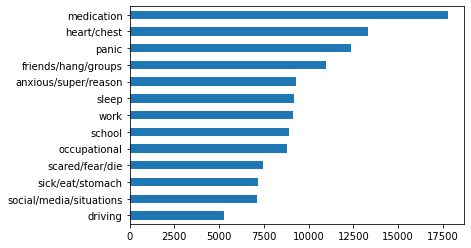

In [486]:
# doc_topic_full.groupby('max_topic').size().sort_values(ascending=True).plot.barh()
doc_topic_full.max_topic.value_counts().sort_values(ascending=True).plot.barh()

In [402]:
doc_topic_full.to_csv('depression_topics_final.csv')

In [ ]:
doc_topic_full[['text_title']+ cols +['max_topic']].sort_values(by=['family'], ascending=False).values[500]


In [ ]:
doc_topic_full.max_topic.value_counts(normalize=True).sort_values().plot.barh()

In [ ]:
plt.figure(figsize=[15,9])

df_temp = doc_topic_full.groupby(doc_topic_full.date.dt.date)['max_topic'].value_counts().to_frame()
df_temp.columns = ['max topic count']
df_temp = df_temp.reset_index()
a = df_temp[df_temp['max_topic'] == 'home/house'].date
b = df_temp[df_temp['max_topic'] == 'home/house']['max topic count']
# plt.bar(a, b)

x = df_temp[df_temp.max_topic == 'social'].date 
y = df_temp[df_temp.max_topic == 'social']['max topic count'].rolling(10).sum()
x2 = df_temp[df_temp.max_topic == 'home/house'].date 
y2 = df_temp[df_temp.max_topic == 'home/house']['max topic count'].rolling(10).sum()
plt.plot(x,y, label='social')
plt.plot(x2,y2, label='school')
plt.legend()

In [ ]:
# doc_topic = pd.DataFrame(doc_topic)
# doc_topic['post'] = df_full.text_title
# doc_topic.values[2]

In [ ]:
# nmf.components_

In [35]:
from corextopic import corextopic as ct
from corextopic import vis_topic as vt

In [37]:
df_clean


,created_utc,subreddit,author,domain,url,num_comments,score,ups,downs,title,...,is_self,from_id,permalink,name,author_flair_text,quarantine,link_flair_text,distinguished,date,text_title
0,1451002020,Anxiety,spwf,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/3y4s...,2,4,4.0,0.0,"My empathy bites me in the ass, on a frequent ...",...,True,NaN,/r/Anxiety/comments/3y4suk/my_empathy_bites_me...,t3_3y4suk,NaN,False,NaN,NaN,2015-12-24 18:07:00,"my empathy bites me in the ass, on a frequent ..."
1,1451448026,Anxiety,steve472,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/3yqo...,4,3,3.0,0.0,hey guys can you help me out? thanks,...,True,NaN,/r/Anxiety/comments/3yqouu/hey_guys_can_you_he...,t3_3yqouu,NaN,False,Needs A Hug/Support,NaN,2015-12-29 22:00:26,hey guys can you help me out? thanks hey guys ...
2,1451183146,Anxiety,cooperslink,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/3ycq...,5,3,3.0,0.0,This is probably common...,...,True,NaN,/r/Anxiety/comments/3ycqjv/this_is_probably_co...,t3_3ycqjv,NaN,False,NaN,NaN,2015-12-26 20:25:46,this is probably common... i always feel like ...
3,1450836919,Anxiety,[deleted],self.Anxiety,https://www.reddit.com/r/Anxiety/comments/3xwu...,0,2,2.0,0.0,My Boyfriend Is Afraid of Disasters Every Day,...,True,NaN,/r/Anxiety/comments/3xwuuf/my_boyfriend_is_afr...,t3_3xwuuf,NaN,False,Relationships,NaN,2015-12-22 20:15:19,my boyfriend is afraid of disasters every day ...
4,1450657537,Anxiety,ArcadeInvasion,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/3xn1...,6,10,10.0,0.0,What do you do to help with your anxiety?,...,True,NaN,/r/Anxiety/comments/3xn1yo/what_do_you_do_to_h...,t3_3xn1yo,NaN,False,Needs A Hug/Support,NaN,2015-12-20 18:25:37,what do you do to help with your anxiety? just...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126719,1496271608,Anxiety,kcapc213,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/6eio...,2,1,NaN,NaN,Do I have an anxiety disorder?,...,True,NaN,/r/Anxiety/comments/6eiorq/do_i_have_an_anxiet...,NaN,NaN,False,NaN,NaN,2017-05-31 18:00:08,"do i have an anxiety disorder? recently, i've ..."
126720,1493734262,Anxiety,mackstrat,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/68tc...,0,1,NaN,NaN,"A little bit of my life, parental issues, and ...",...,True,NaN,/r/Anxiety/comments/68tcf9/a_little_bit_of_my_...,NaN,NaN,False,NaN,NaN,2017-05-02 09:11:02,"a little bit of my life, parental issues, and ..."
126721,1494717413,Anxiety,Sportgirl234,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/6b0u...,10,97,NaN,NaN,Panic attack at the gym,...,True,NaN,/r/Anxiety/comments/6b0ubj/panic_attack_at_the...,NaN,NaN,False,NaN,NaN,2017-05-13 18:16:53,panic attack at the gym today my husband and i...
126722,1494131908,Anxiety,Whit3boy316,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/69pk...,1,4,NaN,NaN,6 year old with anxiety when sick - help,...,True,NaN,/r/Anxiety/comments/69pkrb/6_year_old_with_anx...,NaN,NaN,False,Needs A Hug/Support,NaN,2017-05-06 23:38:28,6 year old with anxiety when sick - help hello...


In [38]:
words = list(np.asarray(vectorizer.get_feature_names()))

In [51]:
anch_words = [['social', 'media'],
              ['scared', 'fear'],
              ['sick', 'eat'],
              ['driving', 'car'],
              ['school'],
              ['friends'], ['heart', 'chest']]



In [52]:
list(anch_words)

[['social', 'media'],
 ['scared', 'fear'],
 ['sick', 'eat'],
 ['driving', 'car'],
 ['school'],
 ['friends'],
 ['heart', 'chest']]

In [53]:
import scipy.sparse as ss
doc_term2 = ss.csr_matrix(doc_term)

In [56]:
anchored_topic_model = ct.Corex(n_hidden=8, seed=1, verbose=False)
anchored_topic_model.fit(doc_term2, words=words, anchors=anch_words, anchor_strength=3, docs=df_clean.text_title)




In [57]:
topics = anchored_topic_model.get_topics(n_words=50)
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))
    print()

0: irc,downloads,salutations,faq,wiki,newcomers,weblink,chatroom,qotw,greetings,protector,provocation,provoked,psychopathic,pyjamas,aaaand,props,quirk,raid,ramen,rarity,ratio,readily,qid,promiscuous,presses,profuse,phobias,phrasing,pig,pinpoint,pit,planing,plant,plucked,plunged,pointer,politician,poof,potato,practices,presently,rearrange,prioritizing,progressing,reassurances,recieving,receives,risking,risky

1: absolutley,psychologically,puppet,purchased,quadruple,qualifies,quasi,que,proximity,quiets,rack,racked,radically,rainbow,ramifications,ratings,raw,quoted,readjust,protest,promising,pipes,plane,playlists,pleasures,plummet,poked,postpartum,prone,practising,preceding,preferable,preoccupation,prepped,pricks,productively,prolong,practitioners,pilots,realisation,reasoned,restored,restricting,retaining,retiring,rewatching,rewire,risen,restart,rituals

2: absorbing,purchasing,pure,pursuits,pushups,quack,qualifying,quantity,quiting,pups,quo,ragged,rail,raising,rampage,ranged,raping,refoc

In [ ]:

import gensim

documents = a.text_title

# documents = topic_doc_df.sort_values(by=['dietary_related'], ascending=False).text_title.head(10000)
# documents = topic_doc_df[topic_doc_df.max_label == 'suicide'].text_title
tokenized_docs = [gensim.utils.simple_preprocess(d) for d in documents]
model = gensim.models.Word2Vec(tokenized_docs, size=500, window=5, min_count=5, sg=1)

In [ ]:
man_wom = model.wv['psychiatrist'] - model.wv['counselor']
model.wv.similar_by_vector(man_wom,topn=20)

In [ ]:
man_wom = model.wv['psychiatrist'] - model.wv['meds'] 
model.wv.similar_by_vector(man_wom,topn=20)
# gend = model.wv['gender']
# cos_sim=np.dot(man_wom,gend)/(np.linalg.norm(man_wom)*np.linalg.norm(gend))
# cos_sim

In [ ]:
man_wom = model.wv['sexual'] - model.wv['abuse'] 
model.wv.similar_by_vector(man_wom,topn=20)

In [ ]:
man_wom = model.wv['zelda'] + model.wv['anime'] 
model.wv.similar_by_vector(man_wom,topn=20)

In [ ]:
man_wom = model.wv['exhausted'] + model.wv['bored'] 
model.wv.similar_by_vector(man_wom,topn=20)